# Generates all-sky map of the sightlines

In [1]:
import astropy.coordinates as coord
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from astropy.io import ascii
import astropy.units as u

In [2]:
#tbl is the Southern FB and tblnorth is from Bordoloi et al. 2017
tbl = ascii.read("hv_summary.txt")
tblnorth = ascii.read("northern_sightlinesv2.txt",delimiter=" ")

In [3]:
l = coord.Angle(tbl['l'], unit=u.deg)
l = l.wrap_at(180*u.degree) #matplotlib only accepts data [-180,180]. More info at http://www.astropy.org/astropy-tutorials/plot-catalog.html
b = coord.Angle(tbl['b'], unit=u.deg)

#Northern Bubble
ln = coord.Angle(tblnorth['l'], unit=u.deg)
ln = ln.wrap_at(180*u.degree) #matplotlib only accepts data [-180,180]. More info at http://www.astropy.org/astropy-tutorials/plot-catalog.html
bn = coord.Angle(tblnorth['b'], unit=u.deg)

In [4]:
#This function generates points at the circumference of the FBs
def PointsInCircum (r,key,n=500):
    if key == "North":
        return [(np.cos(2*np.pi/n*x)*r,np.sin(2*np.pi/n*x)*r+28) for x in range(0,n+1)]
    elif key == "South":
        return [(np.cos(2*np.pi/n*x)*r,np.sin(2*np.pi/n*x)*r-28) for x in range(0,n+1)]

tmpsouth = PointsInCircum(26,key = "South")
tmpsouth = np.asarray(tmpsouth)
FBSouthl = coord.Angle(tmpsouth[:,0], unit=u.deg) #gal long
FBSouthb = coord.Angle(tmpsouth[:,1], unit=u.deg) #gal lat

tmpnorth = PointsInCircum(26,key = "North")
tmpnorth = np.asarray(tmpnorth)
FBNorthl = coord.Angle(tmpnorth[:,0], unit=u.deg) #gal long
FBNorthb = coord.Angle(tmpnorth[:,1], unit=u.deg) #gal lat

In [7]:
#Colour wheel for plot
use_colours = {"P": "blue", "N": "red", "M": "violet", "A": "white", "B": "black"} #P = positive, N = negative, A = neither, B = Bordoloi, M = both positive and negative
use_colours_array = ["blue", "red", "violet", "white"]

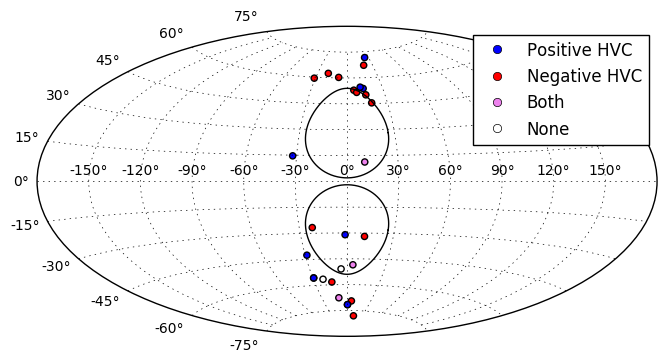

In [9]:
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection = "aitoff")
ax.scatter(l.radian, b.radian, c=[use_colours[x[0]] for x in tbl['HVC']])
ax.plot(FBSouthl.radian,FBSouthb.radian,'k-',alpha = 1, label="Fermi Bubble Contour")
ax.plot(FBNorthl.radian,FBNorthb.radian,'k-',alpha = 1)
ax.scatter(ln.radian,bn.radian, c=[use_colours[x[0]] for x in tblnorth['B']])
ax.grid(True)
markers = [plt.Line2D([0,0],[0,0],color=color, marker='o', linestyle='') for color in use_colours_array]
ax.legend(markers, ["Positive HVC", "Negative HVC", "Both", "None"], numpoints=1,loc = "best")
#ax.legend()
plt.savefig("All-sky-map_v2.pdf",bbox_inches="tight",dpi=600)